In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl

In [112]:
# let's look at the GOLD STANDARD, the polysomnography!
# you can find it in report_simplified.html

# 0. open it in your browser (click on it) and see how it looks like, you will need it!

In [113]:
#let's access this report; we will import all as pandas dataframes (this may take up to 1 minute)
dfs = pd.read_html('report_simplified.html',header=0)

# NOTE: dfs is a list of pandas dataframes
type(dfs)

list

In [114]:
# 1. how many dataframes were collected?
n_dfs = len(dfs)
n_dfs

24

In [115]:
# 2. get a quick look at dataframes 0-3: do we need them? 

dfs0 = dfs[0]
print(dfs0)

dfs1 = dfs[1]
print(dfs1)

dfs2 = dfs[2]
print(dfs2)

dfs3 = dfs[3]
print(dfs3)

## We will need dataframe 1 and dataframe 2

  General Information  Unnamed: 1      Unnamed: 2     Unnamed: 3
0               Name:         NaN           PSXXX            NaN
1                 ID:         NaN             DDD            NaN
2                Sex:         NaN             XXX            NaN
3                Age:         NaN  XX [1/1/19XX ]  Scorer: zzzzz
  Unnamed: 0  Epochs
0      Awake     102
1    Stage 1      86
2    Stage 2     340
3    Stage 3     153
4    Stage 4       0
5        REM     153
6         MT       0
7     Totals     834
  Lights Out:  1/15/2020 22:41:22
0  Lights On:  1/16/2020 06:12:50
Empty DataFrame
Columns: [Unnamed: 0, 16 lights-on  epochs.  0 no-data  epochs scored as wake.]
Index: []


In [116]:
# 3. we have identified the dataframes we need; they ar eall of the same type, let's create one dataframe 
# with all the data we need!

# here I create a df with dfs[4] and dfs[5]
##df_new = pd.concat([dfs[4], dfs[5]], ignore_index=True)

# let's create one datadrame with all the data we need! 
# Epoch Number: from 1 to 919

df_new = pd.concat([dfs[4], dfs[5], dfs[6],dfs[7],dfs[8],dfs[9],dfs[10],dfs[11],dfs[12],dfs[13],dfs[14],dfs[15],dfs[16],dfs[17],dfs[18],dfs[19],dfs[20],dfs[21],dfs[22],dfs[23]], ignore_index=True)
df_new

,# Epoch Number,Stg,MicAr,{#}Any Apnea,{#}Apnea Obstructive,{#} Apnea Mixed,{#}Apnea Central,{#}Hypopnea Total,"SUM(#DESAT_100_REM, {#}) Desaturation",{#}Leg Movement,#
0,1,L,0,0,0,0,0,0,0,0,1
1,2,L,0,0,0,0,0,0,0,0,2
2,3,L,0,0,0,0,0,0,0,0,3
3,4,L,0,0,0,0,0,0,0,0,4
4,5,L,0,0,0,0,0,0,0,0,5
5,6,L,0,0,0,0,0,0,0,0,6
6,7,L,0,0,0,0,0,0,0,0,7
7,8,L,0,0,0,0,0,0,0,0,8
8,9,L,0,0,0,0,0,0,0,0,9
9,10,L,0,0,0,0,0,0,0,0,10


In [117]:
# 4. Create a new column in the dataframe with the same notation for the hypnogram
# we defined: #'1' = deep (N3) sleep - '2' = light (N1 or N2) sleep - '3' = REM sleep - '4' = awake

# create a new column and initialize it to value 0
df_new['hypno'] = 0

# what are the different values of sleep here?
print(set(np.array(df_new['Stg'])))
# ask if you do not know how to interpret one value!

# define a dictionary as we did last week

dic_sleep = {'N3':1 , 'N1':2, 'N2':2 , 'R':3,'W':4,'L':4}

# write the corresponding value in df_new['hypno']
for j in range(len(df_new['hypno'])): df_new['hypno'][j] = dic_sleep[df_new['Stg'][j]]

{'N3', 'R', 'N1', 'L', 'N2', 'W'}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [118]:
# 5. PROBLEM: we have 919 30-sec intervals, we need 840 (from 11pm to 6am)

# from the report, they turned off the lights (and turned on again) at:
# Lights Out: 1/15/2020 22:41:22 
# Lights On: 1/16/2020 06:12:50

# first, we need to remove intervals when the lights were still on:
print('Initial length hypno = '+str(len(df_new['hypno'])))

# first, we have data with lights on... we need to remove them (15 at the beginning, 1 at the end)
hypno = np.array(df_new['hypno'])[15:-1]

print('Length excluding light on = '+str(len(hypno)))

Initial length hypno = 919
Length excluding light on = 903


In [119]:
# 6. let's write down the hypnogram to export,
# we need to write the phase of sleep (from 1 to 4) from 11:00pm to 6:00am , with sleep phase for each 30 seconds
total_number_30sec_int = 7*60*2

df = pd.DataFrame(columns = ['IndexTime','SleepPhase'])
df['IndexTime'] = range(total_number_30sec_int)

# let's cut the first and last 30-sec-intervals of hypno (outside the range of interest)
# from the report, they turned off the lights (and turned on again) at:
# Lights Out: 1/15/2020 22:41:22 
# Lights On: 1/16/2020 06:12:50
intervals_before_11pm = 37
intervals_after_6am = 26

# let's cut the first and last values of hypno (outside the range of interest)
df['SleepPhase'] = hypno[intervals_before_11pm:-(intervals_after_6am)]
df

,IndexTime,SleepPhase
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4
5,5,4
6,6,4
7,7,4
8,8,4
9,9,4


In [120]:
# 7. let's save the final csv file as sensor_GS_output.csv

df.to_csv('psg.csv', index=False)

In [121]:
# 8. import all hypnograms saved: hypno_sensor1 hypno_GS 

# my suggestion:
# - read the csv file
# - transform the SleepPhase column into numpy

# YOUR CODE HERE ...
hypno_gold_table = pd.read_csv('psg.csv')
print(hypno_gold_table)
hypno_sensor2 = hypno_gold_table["SleepPhase"]

hypno_sensor1_table = pd.read_csv('sensor_1_output.csv')
print(hypno_sensor1_table)
hypno_sensor1 = hypno_sensor1_table["SleepPhase"]

     IndexTime  SleepPhase
0            0           4
1            1           4
2            2           4
3            3           4
4            4           4
5            5           4
6            6           4
7            7           4
8            8           4
9            9           4
10          10           4
11          11           4
12          12           4
13          13           4
14          14           4
15          15           4
16          16           4
17          17           4
18          18           4
19          19           4
20          20           4
21          21           4
22          22           4
23          23           4
24          24           4
25          25           4
26          26           4
27          27           4
28          28           4
29          29           4
..         ...         ...
810        810           2
811        811           2
812        812           2
813        813           2
814        814           2
8

In [122]:
# 9. let's calculate the norm 0 distance between these hypnograms 
# if you want to learn more about norms: https://en.wikipedia.org/wiki/Norm_(mathematics)

# example of norm 0 distance between two hypnograms (fraction of intervals that are the same)
distance_1_2 = np.linalg.norm(hypno_sensor1 - hypno_sensor2,0)/len(hypno_sensor1)
distance_1_2

# are the two sensors different?
## The two sensors are different (only 44% the same)

# which one is more accurate? is it significantly more accurate?
## Sensor 1 is more accurate but not by much

# what is the distance to a random signal? do we expect it to be this value?
# The distance to a random signal is 0.4488095238095238 and we expect it to be this value

0.4488095238095238

None
None


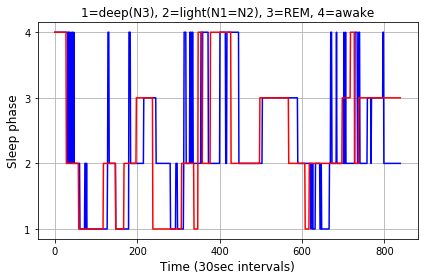

In [123]:
# 10. let's also print the signals 
# print the two signals, 
# and try to print two signals in the same figure so we can check the differences!

def plot_hypno(signal,color):
  # signal is a numpy array
  # color is e.g., 'b', check here for your color: https://matplotlib.org/3.1.0/gallery/color/named_colors.html 
  x = np.arange(len(signal))
  y = signal
  
  fontsizeV = 12
  mpl.plot(x,y,color=color)
  mpl.xlabel('Time (30sec intervals)',fontsize=fontsizeV)
  mpl.ylabel('Sleep phase',fontsize=fontsizeV)
  mpl.yticks([1,2,3,4])
  mpl.title('1=deep(N3), 2=light(N1=N2), 3=REM, 4=awake')
  mpl.grid(True)
  mpl.tight_layout()
  
# YOUR CODE HERE ... (print both hypnograms!!!)
plotted_table_gold = df["SleepPhase"]
print(plot_hypno(plotted_table_gold,"b")) ## Gold hypno
plotted_table_sensor1 = hypno_sensor1_table["SleepPhase"]
print(plot_hypno(plotted_table_sensor1,"r")) ## Gold hypno